In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


#Load the dataset

In [2]:
data = pd.read_csv("/content/tested.csv")

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
data.shape

(418, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Data preprocessing (handle missing data, encoding)

In [7]:
data = data.drop(["Cabin", "Ticket","Name"], axis=1)


In [8]:
data["Age"].fillna(data["Age"].median(), inplace=True)

In [9]:
data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)


In [10]:
data = data.dropna()

In [11]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34.5,0,0,7.8292,Q
1,893,1,3,female,47.0,1,0,7.0000,S
2,894,0,2,male,62.0,0,0,9.6875,Q
3,895,0,3,male,27.0,0,0,8.6625,S
4,896,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,male,27.0,0,0,8.0500,S
414,1306,1,1,female,39.0,0,0,108.9000,C
415,1307,0,3,male,38.5,0,0,7.2500,S
416,1308,0,3,male,27.0,0,0,8.0500,S


# Data exploration

<ipython-input-12-b3d149ed445e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


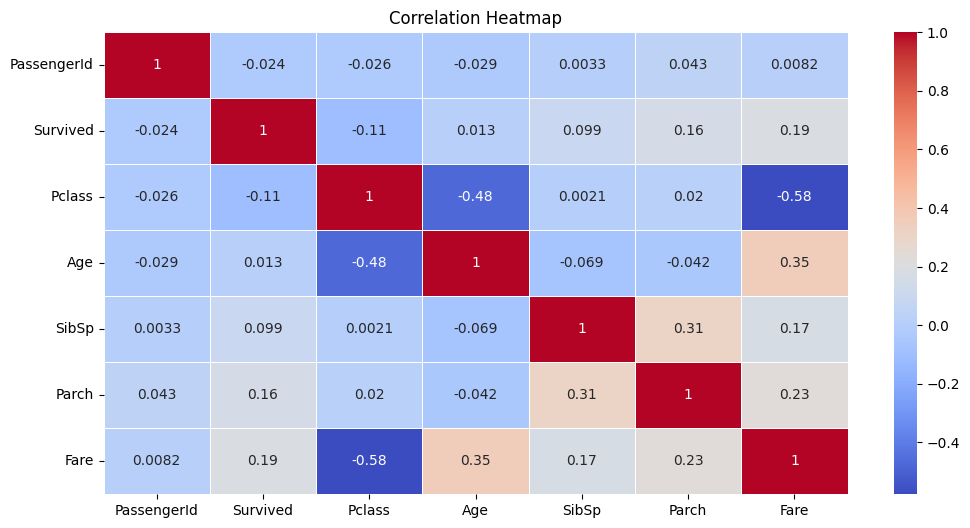

In [12]:
#Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [13]:
data['Sex'].value_counts()

male      265
female    152
Name: Sex, dtype: int64

In [14]:
data['Embarked'].value_counts()

S    269
C    102
Q     46
Name: Embarked, dtype: int64

In [15]:
data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)


In [16]:
data


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,0,34.5,0,0,7.8292,2
1,893,1,3,1,47.0,1,0,7.0000,0
2,894,0,2,0,62.0,0,0,9.6875,2
3,895,0,3,0,27.0,0,0,8.6625,0
4,896,1,3,1,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,0,27.0,0,0,8.0500,0
414,1306,1,1,1,39.0,0,0,108.9000,1
415,1307,0,3,0,38.5,0,0,7.2500,0
416,1308,0,3,0,27.0,0,0,8.0500,0


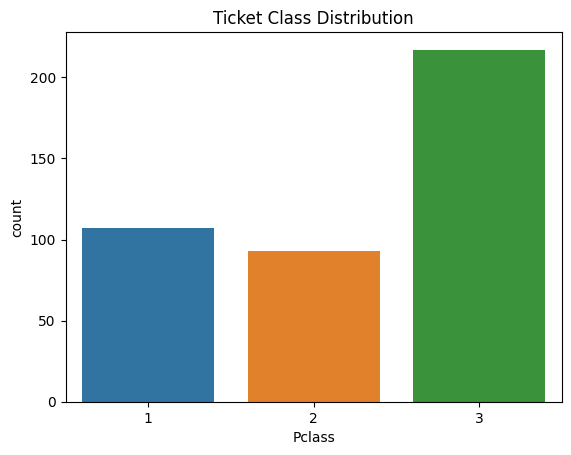

In [17]:
#Ticket Class Distribution
sns.countplot(x='Pclass', data=data)
plt.title("Ticket Class Distribution")
plt.show()

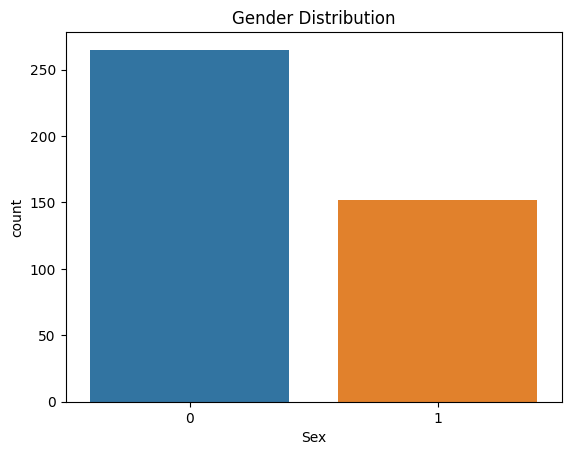

In [18]:
# Countplot of Sex
sns.countplot(x='Sex', data=data)
plt.title("Gender Distribution")
plt.show()

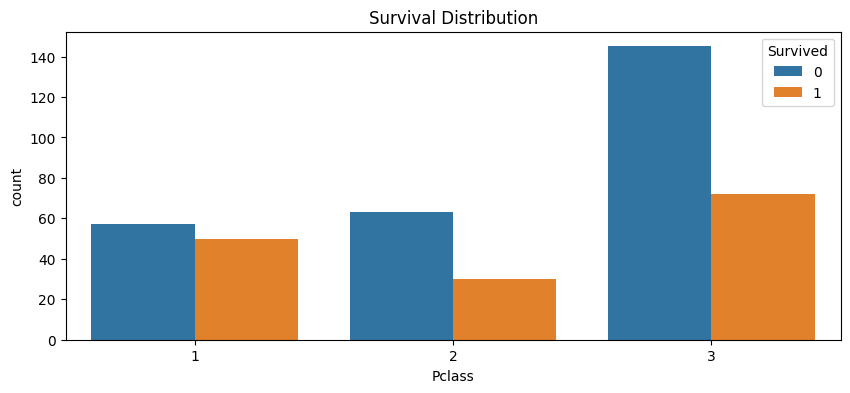

In [19]:
#Survival Distribution
plt.figure(figsize=(10, 4))
sns.countplot(x='Pclass',hue='Survived',data=data)
plt.title("Survival Distribution")
plt.show()

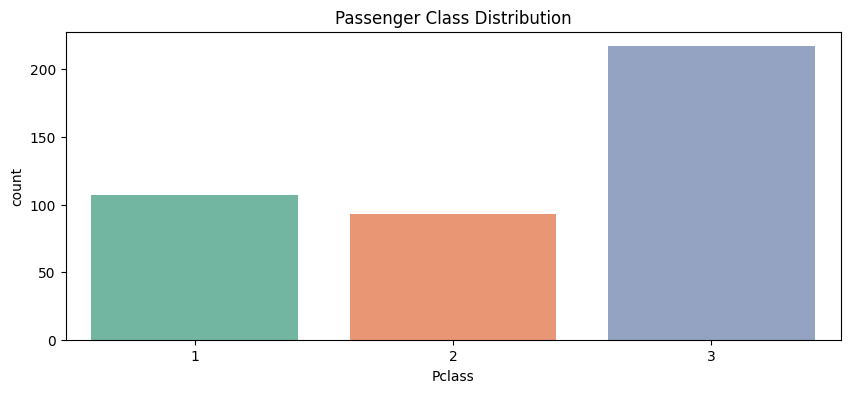

In [20]:
#Passenger Class Distribution
plt.figure(figsize=(10, 4))
sns.countplot(x='Pclass', data=data, palette='Set2')
plt.title("Passenger Class Distribution")
plt.show()

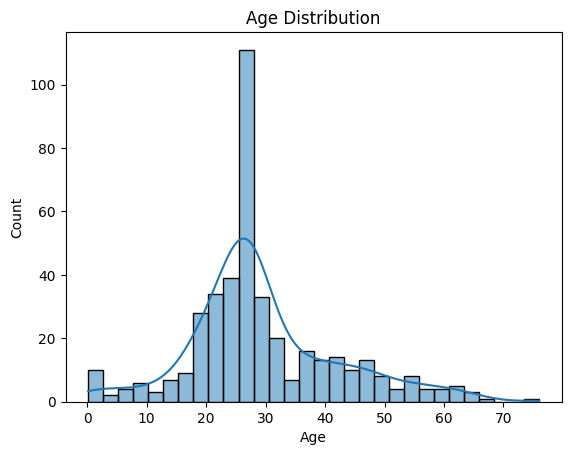

In [21]:
sns.histplot(data['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

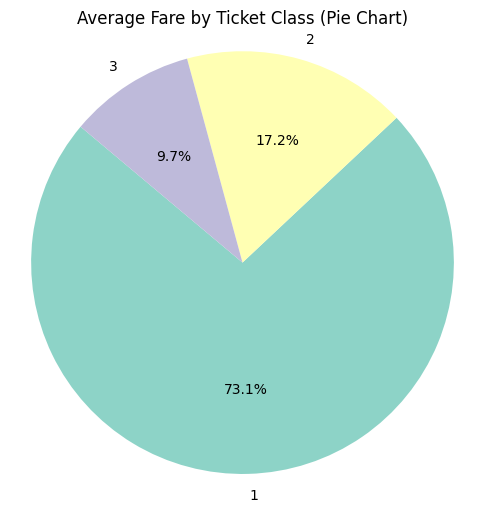

In [22]:
average_fare_by_class = data.groupby('Pclass')['Fare'].mean()
labels = average_fare_by_class.index
sizes = average_fare_by_class.values
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title("Average Fare by Ticket Class (Pie Chart)")
plt.axis('equal')
plt.show()

# Split the data into features and target

In [23]:
X = data.drop("Survived", axis=1)


In [24]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,2
1,893,3,1,47.0,1,0,7.0000,0
2,894,2,0,62.0,0,0,9.6875,2
3,895,3,0,27.0,0,0,8.6625,0
4,896,3,1,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...,...
413,1305,3,0,27.0,0,0,8.0500,0
414,1306,1,1,39.0,0,0,108.9000,1
415,1307,3,0,38.5,0,0,7.2500,0
416,1308,3,0,27.0,0,0,8.0500,0


In [25]:
y = data["Survived"]

In [26]:
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 417, dtype: int64

# Split the data into training and testing sets


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Model building


In [28]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

# Model evaluation

In [29]:
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Data Accuracy: {:.2f}%".format(train_accuracy * 100))



Training Data Accuracy: 100.00%


In [30]:
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Data Accuracy: {:.2f}%".format(test_accuracy * 100))

Testing Data Accuracy: 100.00%
